In [1]:
import pandas as pd

In [2]:
cab_records = pd.read_csv('Cab_Data.csv')

In [3]:
cab_records

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
cab_records.loc[cab_records['City'] == 'NEW YORK NY', 'KM Travelled'].sum()

2248809.74

In [5]:
cab_records.loc[cab_records['City'] == 'ATLANTA GA', 'Price Charged'].sum()

2980241.72

In [6]:
cities_record = pd.read_csv('City.csv')

In [7]:
cities = list(cities_record['City'])

In [8]:
populations = list(cities_record['Population'])

In [9]:
i = 0
pops = []
price_per_km = []
cities_to_evaluate = []
for city in cities:
    if city in cab_records.values:
        cities_to_evaluate.append(city)
        pops.append(populations[i])
        total_km = cab_records.loc[cab_records['City'] == city, 'KM Travelled'].sum()
        total_price = cab_records.loc[cab_records['City'] == city, 'Price Charged'].sum()
        price_per_km.append(total_km/total_price)
    i = i + 1


In [10]:
import matplotlib.pyplot as plt

In [11]:
edited_pops = []
for p in pops:
    p = p.replace(",", "")
    p = int(p)
    edited_pops.append(p)

In [12]:
hypothese1_df = pd.DataFrame()
hypothese1_df['City'] = cities_to_evaluate
hypothese1_df['Price per km']  = price_per_km
hypothese1_df['Population'] = edited_pops
hypothese1_df

,City,Price per km,Population
0,NEW YORK NY,0.039485,8405837
1,CHICAGO IL,0.064598,1955130
2,LOS ANGELES CA,0.061180,1595037
3,MIAMI FL,0.056361,1339155
4,SILICON VALLEY,0.052581,1177609
5,ORANGE COUNTY,0.057128,1030185
6,SAN DIEGO CA,0.064529,959307
7,PHOENIX AZ,0.060561,943999
8,DALLAS TX,0.050210,942908
9,ATLANTA GA,0.056587,814885


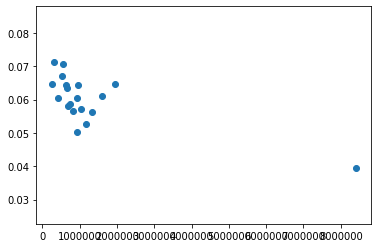

In [13]:
plt.scatter(edited_pops, price_per_km)

In [14]:
kms = list(cab_records['KM Travelled'])

In [15]:
kms.sort()

In [16]:
short_distance_offset = kms[int(len(kms)/4)] # distances under this values will be evaluated as short distances

In [17]:
long_distance_offset = kms[int(3*len(kms)/4)] # distances above this values will be evaluated as long distances

In [18]:
long_distance_offset

32.96

In [19]:
short_distance_cost = cab_records.loc[cab_records['KM Travelled'] <= short_distance_offset, 'Cost of Trip'].sum()

In [20]:
short_distance_income = cab_records.loc[cab_records['KM Travelled'] <= short_distance_offset, 'Price Charged'].sum()

In [21]:
long_distance_cost = cab_records.loc[cab_records['KM Travelled'] >= long_distance_offset, 'Cost of Trip'].sum()

In [22]:
long_distance_income = cab_records.loc[cab_records['KM Travelled'] >= long_distance_offset, 'Price Charged'].sum()

In [23]:
short_profit_rate = (short_distance_income - short_distance_cost)/short_distance_cost

In [24]:
long_profit_rate = (long_distance_income - long_distance_cost)/long_distance_cost

In [25]:
short_profit_rate

0.4809848484118332

In [26]:
long_profit_rate

0.47927762890933717

In [27]:
transactions = pd.read_csv('Transaction_ID.csv')

In [28]:
payment_mode_joined = pd.merge(cab_records, transactions, how="inner", on="Transaction ID")

In [29]:
payment_mode_joined

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [30]:
payment_mode_joined[payment_mode_joined['KM Travelled'] <= short_distance_offset].count()['Transaction ID']

90525

In [31]:
payment_mode_joined[(payment_mode_joined['KM Travelled'] <= short_distance_offset) & (payment_mode_joined['Payment_Mode'] == 'Card')].count()['Transaction ID']

54173

In [32]:
payment_mode_joined[payment_mode_joined['KM Travelled'] >= long_distance_offset].count()['Transaction ID']

90169

In [33]:
payment_mode_joined[(payment_mode_joined['KM Travelled'] >= long_distance_offset) & (payment_mode_joined['Payment_Mode'] == 'Card')].count()['Transaction ID']

54127

In [34]:
pink_cost = cab_records.loc[cab_records['Company'] == 'Pink Cab', 'Cost of Trip'].sum()

In [35]:
yellow_cost = cab_records.loc[cab_records['Company'] == 'Yellow Cab', 'Cost of Trip'].sum()

In [36]:
yellow_income = cab_records.loc[cab_records['Company'] == 'Yellow Cab', 'Price Charged'].sum()

In [37]:
pink_income = cab_records.loc[cab_records['Company'] == 'Pink Cab', 'Price Charged'].sum()

In [38]:
pink_profit_rate = (pink_income - pink_cost)/pink_cost

In [39]:
yellow_profit_rate = (yellow_income - yellow_cost)/yellow_cost

In [40]:
pink_profit_rate

0.25247836732610157

In [41]:
yellow_profit_rate

0.5379259793300798

In [42]:
#I recommend Yellow Cab according to general profit rate

In [43]:
joined_users = pd.merge(cab_records, transactions, how="inner", on="Transaction ID")

In [44]:
joined_users.drop_duplicates(subset='Customer ID')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359114,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card
359123,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash
359155,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card
359157,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash


In [79]:
dist_based_on_city = joined_users.groupby(["City", 'Company']).count()

In [72]:
dist_based_on_city = joined_users.groupby(["City", 'Company']).agg(
                                                        Users = pd.NamedAgg(column='Customer ID', aggfunc=))

In [80]:
dist_based_on_city

Transaction ID  Date of Travel  KM Travelled  \
City           Company                                                    
ATLANTA GA     Pink Cab              1762            1762          1762   
               Yellow Cab            5795            5795          5795   
AUSTIN TX      Pink Cab              1868            1868          1868   
               Yellow Cab            3028            3028          3028   
BOSTON MA      Pink Cab              5186            5186          5186   
               Yellow Cab           24506           24506         24506   
CHICAGO IL     Pink Cab              9361            9361          9361   
               Yellow Cab           47264           47264         47264   
DALLAS TX      Pink Cab              1380            1380          1380   
               Yellow Cab            5637            5637          5637   
DENVER CO      Pink Cab              1394            1394          1394   
               Yellow Cab            2431            2431          2431   
LOS ANGELES CA Pink Cab             19865           19865         19865   
               Yellow Cab           28168           28168         28168   
MIAMI FL       Pink Cab              2002            2002          2002   
               Yellow Cab            4452            4452          4452   
NASHVILLE TN   Pink Cab              1841            1841          1841   
               Yellow Cab            1169            1169          1169   
NEW YORK NY    Pink Cab             13967           13967         13967   
               Yellow Cab           85918           85918         85918   
ORANGE COUNTY  Pink Cab              1513            1513          1513   
               Yellow Cab            2469            2469          2469   
PHOENIX AZ     Pink Cab               864             864           864   
               Yellow Cab            1200            1200          1200   
PITTSBURGH PA  Pink Cab               682             682           682   
               Yellow Cab             631             631           631   
SACRAMENTO CA  Pink Cab              1334            1334          1334   
               Yellow Cab            1033            1033          1033   
SAN DIEGO CA   Pink Cab             10672           10672         10672   
               Yellow Cab            9816            9816          9816   
SEATTLE WA     Pink Cab              2732            2732          2732   
               Yellow Cab            5265            5265          5265   
SILICON VALLEY Pink Cab              3797            3797          3797   
               Yellow Cab            4722            4722          4722   
TUCSON AZ      Pink Cab               799             799           799   
               Yellow Cab            1132            1132          1132   
WASHINGTON DC  Pink Cab              3692            3692          3692   
               Yellow Cab           40045           40045         40045   

                           Price Charged  Cost of Trip  Customer ID  \
City           Company                                                
ATLANTA GA     Pink Cab             1762          1762         1762   
               Yellow Cab           5795          5795         5795   
AUSTIN TX      Pink Cab             1868          1868         1868   
               Yellow Cab           3028          3028         3028   
BOSTON MA      Pink Cab             5186          5186         5186   
               Yellow Cab          24506         24506        24506   
CHICAGO IL     Pink Cab             9361          9361         9361   
               Yellow Cab          47264         47264        47264   
DALLAS TX      Pink Cab             1380          1380         1380   
               Yellow Cab           5637          5637         5637   
DENVER CO      Pink Cab             1394          1394         1394   
               Yellow Cab           2431          2431         2431   
LOS ANGELES CA Pink Cab         

In [46]:
#Yellow Cab has the dominance on the number of customers based on cities

In [47]:
from datetime import date, timedelta

In [48]:
def convert_time(t):
    start = date(1900,1,1)
    delta = timedelta(t)
    dtime = start + delta
    return dtime

In [49]:
dates = list(cab_records['Date of Travel'])

In [50]:
edited_dates = []
for d in dates:
    res = convert_time(d)
    edited_dates.append(res)

In [51]:
edited_dates

[datetime.date(2016, 1, 10),
 datetime.date(2016, 1, 8),
 datetime.date(2016, 1, 4),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 1, 5),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 1, 5),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 1, 14),
 datetime.date(2016, 1, 8),
 datetime.date(2016, 1, 13),
 datetime.date(2016, 1, 8),
 datetime.date(2016, 1, 13),
 datetime.date(2016, 1, 8),
 datetime.date(2016, 1, 10),
 datetime.date(2016, 1, 12),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 1, 10),
 datetime.date(2016, 1, 4),
 datetime.date(2016, 1, 4),
 datetime.date(2016, 1, 8),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 1, 14),
 datetime.date(2016, 1, 5),
 datetime.date(2016, 1, 11),
 datetime.date(2016, 1, 13),
 datetime.date(2016, 1, 13),
 datetime.date(2016, 1, 10),
 datetime.date(2016, 1, 12),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 1, 4),
 datetime.date(2016, 1, 12),
 datetime.date(2016, 1, 5),
 datetime.date(2016, 1, 9),
 datetime.date(2016, 1, 4),
 datet

In [52]:
cab_records['Dates'] = edited_dates

In [53]:
cab_records

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Dates
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-04
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-09
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-05
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-10
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-06
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-07
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-07


In [54]:
years = []
for d in edited_dates:
    years.append(d.year)

In [55]:
cab_records['Year'] = years 

In [56]:
cab_records

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Dates,Year
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,2016
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,2016
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-04,2016
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-09,2016
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-05,2016
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-10,2018
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-06,2018
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-07,2018
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-07,2018


In [57]:
profit_per_year = cab_records.groupby(['Year', 'Company']).agg(total_cost = pd.NamedAgg(column='Cost of Trip', aggfunc=sum),
                                            total_income = pd.NamedAgg(column='Price Charged', aggfunc=sum)
                                            )

In [58]:
profit_per_year['profit'] = (profit_per_year['total_income'] - profit_per_year['total_cost'])/profit_per_year['total_cost']

In [59]:
profit_per_year

total_cost  total_income    profit
Year Company                                         
2016 Pink Cab    6.130271e+06  7.816729e+06  0.275103
     Yellow Cab  2.430158e+07  3.808852e+07  0.567327
2017 Pink Cab    7.543624e+06  9.577059e+06  0.269557
     Yellow Cab  2.925934e+07  4.584596e+07  0.566883
2018 Pink Cab    7.317775e+06  8.896748e+06  0.215772
     Yellow Cab  2.815345e+07  4.176291e+07  0.483403
2019 Pink Cab    2.925235e+04  3.771556e+04  0.289317
     Yellow Cab  1.191402e+05  1.565019e+05  0.313594

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
labels = [2016, 2017, 2018]


In [62]:
pink1 = profit_per_year.loc[2016, 'profit'].loc['Pink Cab']
pink2 = profit_per_year.loc[2017, 'profit'].loc['Pink Cab']
pink3 = profit_per_year.loc[2018, 'profit'].loc['Pink Cab']

yellow1 = profit_per_year.loc[2016, 'profit'].loc['Yellow Cab']
yellow2 = profit_per_year.loc[2017, 'profit'].loc['Yellow Cab']
yellow3 = profit_per_year.loc[2018, 'profit'].loc['Yellow Cab']

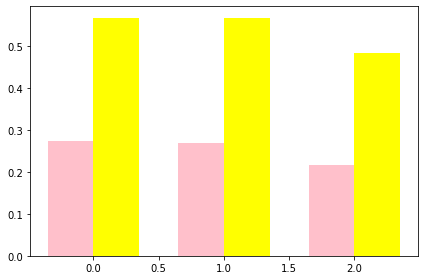

In [63]:
data_1 = [pink1, pink2, pink3]
data_2 = [yellow1, yellow2, yellow3]

x = np.arange(len(labels))
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_1, width, label='Pink', color="pink")
rects2 = ax.bar(x + width/2, data_2, width, label='Yellow', color="yellow")


fig.tight_layout()

plt.show()

In [81]:
dist_based_on_city

Transaction ID  Date of Travel  KM Travelled  \
City           Company                                                    
ATLANTA GA     Pink Cab              1762            1762          1762   
               Yellow Cab            5795            5795          5795   
AUSTIN TX      Pink Cab              1868            1868          1868   
               Yellow Cab            3028            3028          3028   
BOSTON MA      Pink Cab              5186            5186          5186   
               Yellow Cab           24506           24506         24506   
CHICAGO IL     Pink Cab              9361            9361          9361   
               Yellow Cab           47264           47264         47264   
DALLAS TX      Pink Cab              1380            1380          1380   
               Yellow Cab            5637            5637          5637   
DENVER CO      Pink Cab              1394            1394          1394   
               Yellow Cab            2431            2431          2431   
LOS ANGELES CA Pink Cab             19865           19865         19865   
               Yellow Cab           28168           28168         28168   
MIAMI FL       Pink Cab              2002            2002          2002   
               Yellow Cab            4452            4452          4452   
NASHVILLE TN   Pink Cab              1841            1841          1841   
               Yellow Cab            1169            1169          1169   
NEW YORK NY    Pink Cab             13967           13967         13967   
               Yellow Cab           85918           85918         85918   
ORANGE COUNTY  Pink Cab              1513            1513          1513   
               Yellow Cab            2469            2469          2469   
PHOENIX AZ     Pink Cab               864             864           864   
               Yellow Cab            1200            1200          1200   
PITTSBURGH PA  Pink Cab               682             682           682   
               Yellow Cab             631             631           631   
SACRAMENTO CA  Pink Cab              1334            1334          1334   
               Yellow Cab            1033            1033          1033   
SAN DIEGO CA   Pink Cab             10672           10672         10672   
               Yellow Cab            9816            9816          9816   
SEATTLE WA     Pink Cab              2732            2732          2732   
               Yellow Cab            5265            5265          5265   
SILICON VALLEY Pink Cab              3797            3797          3797   
               Yellow Cab            4722            4722          4722   
TUCSON AZ      Pink Cab               799             799           799   
               Yellow Cab            1132            1132          1132   
WASHINGTON DC  Pink Cab              3692            3692          3692   
               Yellow Cab           40045           40045         40045   

                           Price Charged  Cost of Trip  Customer ID  \
City           Company                                                
ATLANTA GA     Pink Cab             1762          1762         1762   
               Yellow Cab           5795          5795         5795   
AUSTIN TX      Pink Cab             1868          1868         1868   
               Yellow Cab           3028          3028         3028   
BOSTON MA      Pink Cab             5186          5186         5186   
               Yellow Cab          24506         24506        24506   
CHICAGO IL     Pink Cab             9361          9361         9361   
               Yellow Cab          47264         47264        47264   
DALLAS TX      Pink Cab             1380          1380         1380   
               Yellow Cab           5637          5637         5637   
DENVER CO      Pink Cab             1394          1394         1394   
               Yellow Cab           2431          2431         2431   
LOS ANGELES CA Pink Cab         

In [84]:
cities.remove('SAN FRANCISCO CA')

In [87]:
p_NoOfUsers = []
for c in cities:
    number = dist_based_on_city.loc[c, 'Customer ID'].loc['Pink Cab']
    p_NoOfUsers.append(number)

In [88]:
y_NoOfUsers = []
for c in cities:
    number = dist_based_on_city.loc[c, 'Customer ID'].loc['Yellow Cab']
    y_NoOfUsers.append(number)

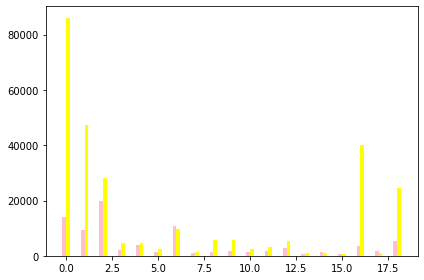

In [91]:
data_1 = p_NoOfUsers
data_2 = y_NoOfUsers

x = np.arange(len(cities))
width = 0.2


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_1, width, label='Pink', color="pink")
rects2 = ax.bar(x + width/2, data_2, width, label='Yellow', color="yellow")


fig.tight_layout()

plt.show()

In [90]:
p_NoOfUsers

[13967,
 9361,
 19865,
 2002,
 3797,
 1513,
 10672,
 864,
 1380,
 1762,
 1394,
 1868,
 2732,
 799,
 1334,
 682,
 3692,
 1841,
 5186]

In [96]:
km_per_year = cab_records.groupby(['Year', 'Company']).agg(total_km = pd.NamedAgg(column='KM Travelled', aggfunc=sum),
                                                           total_cost = pd.NamedAgg(column='Cost of Trip', aggfunc=sum)
                                            )

In [98]:
km_per_year['cost_per_km'] = km_per_year['total_cost']/km_per_year['total_km']

In [99]:
km_per_year

total_km    total_cost  cost_per_km
Year Company                                          
2016 Pink Cab     557661.46  6.130271e+06    10.992819
     Yellow Cab  1840883.96  2.430158e+07    13.201040
2017 Pink Cab     685682.69  7.543624e+06    11.001625
     Yellow Cab  2216079.63  2.925934e+07    13.203200
2018 Pink Cab     665084.39  7.317775e+06    11.002777
     Yellow Cab  2133452.56  2.815345e+07    13.196191
2019 Pink Cab       2644.57  2.925235e+04    11.061287
     Yellow Cab     9001.32  1.191402e+05    13.235858

In [100]:
revenue_per_km = cab_records.groupby(['Year', 'Company']).agg(total_km = pd.NamedAgg(column='KM Travelled', aggfunc=sum),
                                                           total_revenue = pd.NamedAgg(column='Price Charged', aggfunc=sum)
                                            )

In [101]:
revenue_per_km['revenue_per_km'] = revenue_per_km['total_revenue']/revenue_per_km['total_km']

In [102]:
revenue_per_km

total_km  total_revenue  revenue_per_km
Year Company                                              
2016 Pink Cab     557661.46   7.816729e+06       14.016979
     Yellow Cab  1840883.96   3.808852e+07       20.690342
2017 Pink Cab     685682.69   9.577059e+06       13.967188
     Yellow Cab  2216079.63   4.584596e+07       20.687865
2018 Pink Cab     665084.39   8.896748e+06       13.376871
     Yellow Cab  2133452.56   4.176291e+07       19.575269
2019 Pink Cab       2644.57   3.771556e+04       14.261509
     Yellow Cab     9001.32   1.565019e+05       17.386547

In [104]:
number_of_trip = cab_records.groupby(['Year', 'Company']).count()

In [105]:
number_of_trip

Transaction ID  Date of Travel   City  KM Travelled  \
Year Company                                                           
2016 Pink Cab             24840           24840  24840         24840   
     Yellow Cab           81399           81399  81399         81399   
2017 Pink Cab             30301           30301  30301         30301   
     Yellow Cab           98212           98212  98212         98212   
2018 Pink Cab             29456           29456  29456         29456   
     Yellow Cab           94671           94671  94671         94671   
2019 Pink Cab               114             114    114           114   
     Yellow Cab             399             399    399           399   

                 Price Charged  Cost of Trip  Dates  
Year Company                                         
2016 Pink Cab            24840         24840  24840  
     Yellow Cab          81399         81399  81399  
2017 Pink Cab            30301         30301  30301  
     Yellow Cab          98212         98212  98212  
2018 Pink Cab            29456         29456  29456  
     Yellow Cab          94671         94671  94671  
2019 Pink Cab              114           114    114  
     Yellow Cab            399           399    399

In [108]:
data = list(number_of_trip['Transaction ID'])

In [109]:
data

[24840, 81399, 30301, 98212, 29456, 94671, 114, 399]

In [112]:
p_data = []
y_data = []
for i in range(6):
    if i%2 == 0:
        p_data.append(data[i])
    else:
        y_data.append(data[i])

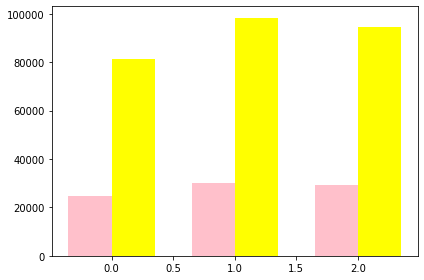

In [114]:
data_1 = p_data
data_2 = y_data

x = np.arange(3)
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_1, width, label='Pink', color="pink")
rects2 = ax.bar(x + width/2, data_2, width, label='Yellow', color="yellow")


fig.tight_layout()

plt.show()

In [115]:
transactions_with_users = pd.merge(cab_records, transactions, how="inner", on="Transaction ID")

In [117]:
transactions_with_users

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Dates,Year,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,2016,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,2016,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-04,2016,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-09,2016,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-05,2016,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-10,2018,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-06,2018,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-07,2018,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-07,2018,52175,Card


In [144]:
d1 = transactions_with_users.groupby(['Year', 'Company', 'Customer ID']).count()

In [145]:
d1

Transaction ID  Date of Travel  City  \
Year Company    Customer ID                                         
2016 Pink Cab   1                         1               1     1   
                2                         1               1     1   
                3                         2               2     2   
                5                         2               2     2   
                6                         1               1     1   
...                                     ...             ...   ...   
2019 Yellow Cab 59374                     1               1     1   
                59494                     1               1     1   
                59575                     1               1     1   
                59663                     1               1     1   
                59925                     1               1     1   

                             KM Travelled  Price Charged  Cost of Trip  Dates  \
Year Company    Customer ID                                                     
2016 Pink Cab   1                       1              1             1      1   
                2                       1              1             1      1   
                3                       2              2             2      2   
                5                       2              2             2      2   
                6                       1              1             1      1   
...                                   ...            ...           ...    ...   
2019 Yellow Cab 59374                   1              1             1      1   
                59494                   1              1             1      1   
                59575                   1              1             1      1   
                59663                   1              1             1      1   
                59925                   1              1             1      1   

                             Payment_Mode  
Year Company    Customer ID                
2016 Pink Cab   1                       1  
                2                       1  
                3                       2  
                5                       2  
                6                       1  
...                                   ...  
2019 Yellow Cab 59374                   1  
                59494                   1  
                59575                   1  
                59663                   1  
                59925                   1  

[135302 rows x 8 columns]

In [147]:
pink_customers_trips_16 = list(d1.loc[2016, 'Transaction ID'].loc['Pink Cab'])

In [148]:
pink_customers_trips_16

[1,
 1,
 2,
 2,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 6,
 1,
 2,
 2,
 1,
 2,
 4,
 1,
 3,
 4,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 5,
 2,
 2,
 3,
 2,
 3,
 1,
 4,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 4,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 5,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 5,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 3,
 2,
 2,
 3,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 4,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 2,


In [151]:
p_trip_per_customer_16 = sum(pink_customers_trips_16)/len(pink_customers_trips_16)

In [153]:
pink_customers_trips_17 = list(d1.loc[2017, 'Transaction ID'].loc['Pink Cab'])
p_trip_per_customer_17 = sum(pink_customers_trips_17)/len(pink_customers_trips_17)

In [154]:
pink_customers_trips_18 = list(d1.loc[2018, 'Transaction ID'].loc['Pink Cab'])
p_trip_per_customer_18 = sum(pink_customers_trips_18)/len(pink_customers_trips_18)

In [155]:
yellow_customers_trips_16 = list(d1.loc[2016, 'Transaction ID'].loc['Yellow Cab'])
y_trip_per_customer_16 = sum(yellow_customers_trips_16)/len(yellow_customers_trips_16)

In [156]:
yellow_customers_trips_17 = list(d1.loc[2017, 'Transaction ID'].loc['Yellow Cab'])
y_trip_per_customer_17 = sum(yellow_customers_trips_17)/len(yellow_customers_trips_17)

In [157]:
yellow_customers_trips_18 = list(d1.loc[2018, 'Transaction ID'].loc['Yellow Cab'])
y_trip_per_customer_18 = sum(yellow_customers_trips_18)/len(yellow_customers_trips_18)

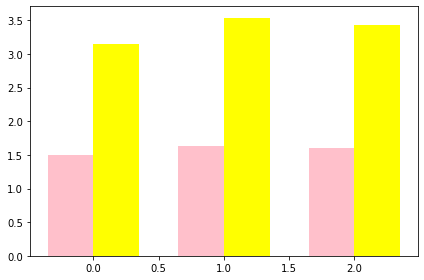

In [158]:
data_1 = [p_trip_per_customer_16, p_trip_per_customer_17, p_trip_per_customer_18]
data_2 = [y_trip_per_customer_16, y_trip_per_customer_17, y_trip_per_customer_18]

x = np.arange(3)
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_1, width, label='Pink', color="pink")
rects2 = ax.bar(x + width/2, data_2, width, label='Yellow', color="yellow")


fig.tight_layout()

plt.show()

In [159]:
data_1

[1.5001811813020896, 1.626200826490635, 1.595752749336367]

In [160]:
data_2

[3.15487771791791, 3.531916423922034, 3.4382059197385146]